In [1]:
# Works best with jupyter-notebook

In [17]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math
from collections import namedtuple

from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr

import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 4.6 - Rotational Interpolation

### Roll-Pitch-Yaw Interpolation

Using the toolbox function **jtraj()**, RPY angles can be interpolated. 

jtraj() returns: 
trajectory of coordinates and optionally velocity and acceleration

For example, we can interpolate between (0, 0, 0) & (-π/2, π/2, π/4) radians over 100 time steps:

In [18]:
q0=[0, 0, 0]
qf=[-np.pi/2, np.pi/2, np.pi/4]

out = tr.jtraj(q0, qf, tv=100)
#print(out.q)

<IPython.core.display.Javascript object>


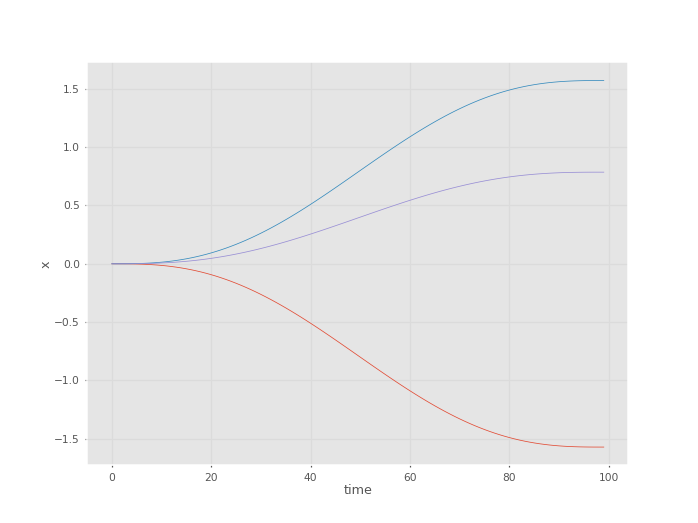

In [19]:
#plot trajectory 
fig1=plt.figure(1);
plt.xlabel('time');
plt.ylabel('x');
plt.plot(out.q);

### Converstion to Rotation matrices

Consider now that we want to convert from RPY angles to rotation matrices for each instance of interpolated angles

In [30]:
#The first rotation matrix can be viewed by:
qr1 = out.q[0]
print("The first angle is: ", qr1, "\n")


R1 = rpy2r(qr1);
print(R1)

The first angle is:  [       0        0        0] 

[[       1        0        0]
 [       0        1        0]
 [       0        0        1]]


In [38]:
#The last rotation matrix can be viewed by:
qr10 = out.q[-1]
print("The last angle is: ", qr10, "\n")

# We can alternatively use each col of qr10
R10 = rpy2r(qr10[0],qr10[1],qr10[2]);
print(R10)


The last angle is:  [  -1.571    1.571   0.7854] 

[[       0  -0.7071  -0.7071]
 [       0  -0.7071   0.7071]
 [      -1        0        0]]


## Tranimate
The sequence can be animated by passing the rotation matrices to the toolbox function tranimate():

### Student exercise: 
1. Work in pairs
2. Solve this tranimate problem (need to work outside jupyter AND you have 15 mins to work on it)
3. Volunteer to share your solution with the class via shared screen.

## Quaternion Interpolation

An interpolated quaternion between q0 when s = 0 to q1 when s = 1.

Interpolation is performed on a great circle on a 4D hypersphere. This is a rotation about a single fixed axis in space which yields the straightest and shortest path between two points.

For large rotations the path may be the long way around the circle, the option 'shortest' ensures always the shortest path.

In [40]:
from math import sqrt

q0 = [1/sqrt(2), 1/sqrt(2), 0, 0]  # 90deg rotation about x-axis
q1 = [1/sqrt(2), 0, 1/sqrt(2), 0]  # 90deg rotation about y-axis

In [41]:
qprint(slerp(q0, q1, 0))           # this is q0
qprint(slerp(q0, q1, 1))           # this is q1
qprint(slerp(q0, q1, 0.5))         # this is in "half way" between

 0.7071 <  0.7071,  0.0000,  0.0000 >
 0.7071 <  0.0000,  0.7071,  0.0000 >
 0.8165 <  0.4082,  0.4082,  0.0000 >
